# TWITTER SENTIMENT ANALYSIS

# Importing the necessary dependencies

In [1]:
# Importing necessary libraries and functions :
import pandas as pd
import numpy as np
import time
from math import sqrt

# Text processing libraries :
#!pip install gensim
import gensim 
import re # Regular Expression library
import string
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize # Tokenizaion 
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Plotting libraries :
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# sklearn :
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

# Reading and Loading the Dataset

In [2]:
# Importing the dataset :
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(r"C:\Users\lenovo\Downloads\twitter csv.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

# Display of the first 5 lines :
df.sample(5)

,target,ids,date,flag,user,text
643408,0,2235765127,Fri Jun 19 02:01:12 PDT 2009,NO_QUERY,_Marney,@jamie_oliver lol Jamie..can you do it soonish...
533925,0,2197318331,Tue Jun 16 13:37:40 PDT 2009,NO_QUERY,LivReynolds,@mrs_chainsaw I'm going assssss an artist or s...
274653,0,1990641144,Mon Jun 01 05:23:41 PDT 2009,NO_QUERY,compositeone,@timlandslide I miss South Wales more in the s...
601997,0,2221281324,Thu Jun 18 05:04:43 PDT 2009,NO_QUERY,stacy729,@GabrielSaporta I'm so sorry you lost If it m...
348496,0,2016778612,Wed Jun 03 07:20:44 PDT 2009,NO_QUERY,Bforbee,Just got home from the mall. I haven't been tw...


# Exploratory Data Analysis (EDA)

In [3]:
# Display the column names of our dataset :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [4]:
# Display the number of records is our dataset :
print('length of our data is {} tweets'.format(len(df)))

length of our data is 1600000 tweets


In [5]:
# Getting info about our dataset :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


The range index of the records starts from 0 to 1599999

In [7]:
print(df.dtypes)

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object


The data type of some columns in our dataset is object, which means we still have to process our data before getting into machine learning stuff.

In [8]:
# Checking for Null values :
print("number of missing values in the dataframe is {}".format(np.sum(df.isnull().any(axis=1))))

number of missing values in the dataframe is 0


There are no missing values in our dataset.
We got four columns with string values ( date,flag,user,text ) and two other columns with integers (target and ids)

In [9]:
# Rows and columns in the dataset :
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [10]:
# Checking unique Target Values :
df['target'].unique()

array([0, 4], dtype=int64)

In [11]:
df['target'].nunique()

2

In [12]:
# Let's explore our target variable 'target'
print("the number of unique values of the target variable is {}".format(df['target'].nunique()))
print("unique values of target variable are {0} and {1}".format(df['target'].unique()[0],df['target'].unique()[1]))

the number of unique values of the target variable is 2
unique values of target variable are 0 and 4


The target column is composed of just 0 and 4
* 0 stands for negative sentiment.
* 4 stands for positive sentiment.

In [13]:
# Replacing the values to ease understanding :
df['target'] = df['target'].replace(4,1)

The target column is composed of just 0 and 1
* 0 stands for negative sentiment.
* 1 stands for positive sentiment.

In [14]:
# Exploring our date feature :
print("The number of unique values of the date feature is {}".format(df['date'].nunique()))

The number of unique values of the date feature is 774363


In [15]:
# Exploring the flag feature :
print("The number of unique values of the ids feature is {}".format(df['flag'].nunique()))
print("Unique values of ids feature are {}".format(df['flag'].unique()[0]))

The number of unique values of the ids feature is 1
Unique values of ids feature are NO_QUERY


The feature flag has the same value for all rows, which makes it insignificant for our model

In [16]:
# Explore the user feature :
print("The number of unique values of the user feature is {}".format(df['user'].nunique()))

The number of unique values of the user feature is 659775


Since the number of users is less than the number of tweets, there must be users in our dataset who posted more than one tweet.

In [17]:
# Reviewing duplicates in tweet feature :
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))

The number of unique values of the text feature is 1581466


Since the number of records in our dataset is 1600000,that means there are duplicates in the tweet records

# Data Visualization of Target Variables

In [21]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
1,800000,800000,800000,800000,800000


Since the target column only contains 0 or 4, using the .groupby() function will result in two categories: 0 and 4

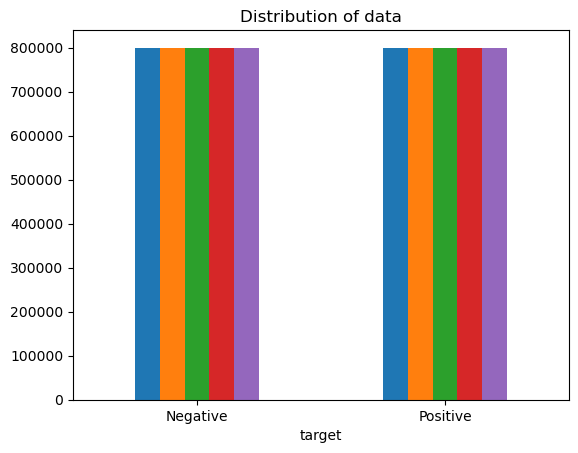

In [22]:
# Plotting the distribution for dataset :
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
# Naming 0 -> Negative , and 4 -> Positive
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists :
text, sentiment = list(df['text']), list(df['target'])

We can see that we have an equal number of tweets with positive sentiments and negative sentiments.
* Each color represents one of the columns : ids, date, flag, user and text.
* text variable contains the text column.
* sentiment variable contains the target column.

<Axes: xlabel='target', ylabel='count'>

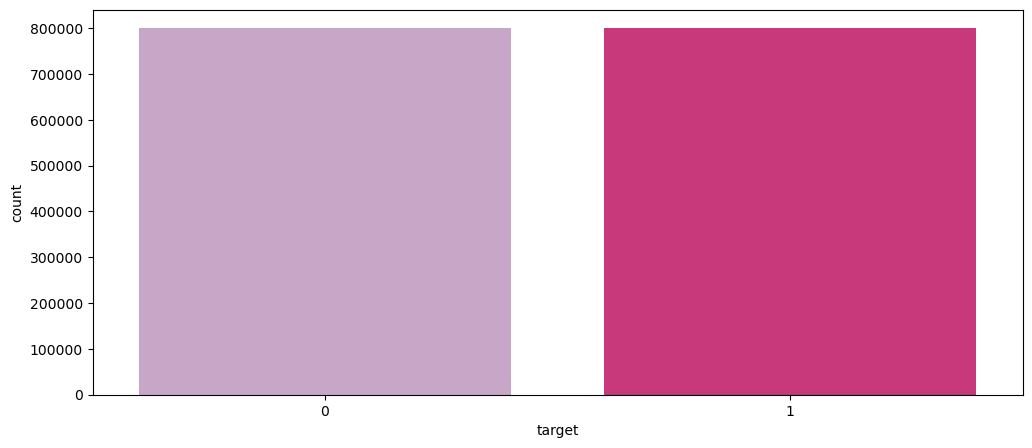

In [26]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=df, x="target", palette="PuRd")

We did the same as before, we just used the .countplot() function from seaborn

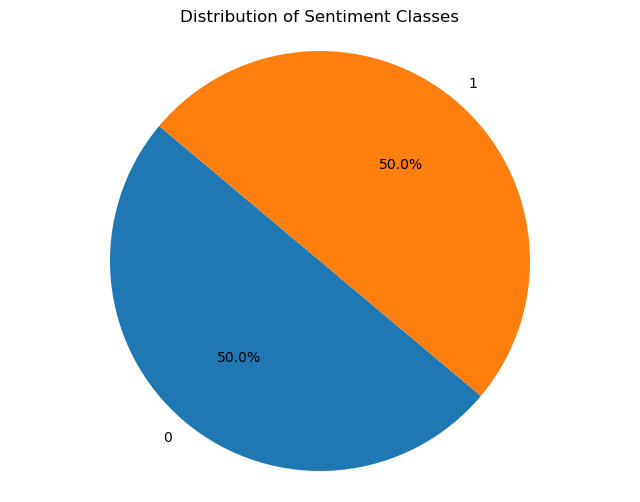

In [27]:
# Count the number of tweets for each sentiment class
sentiment_counts = df['target'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

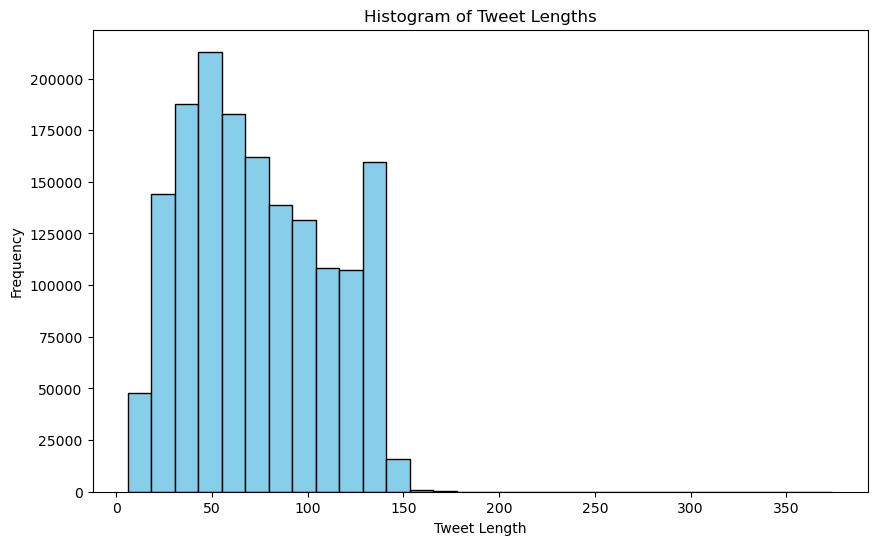

In [28]:
# Calculate tweet lengths
df['text_length'] = df['text'].apply(len)

# Plot histogram of tweet lengths
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Data Preprocessing 

In [19]:
# Lowering Case :
print("=========== Before Lowering case ============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Lowering case ===========\n")
df['text'] = df['text'].str.lower()
print("\t" + df.loc[10, "text"])

=========== Before Lowering case ============

	spring break in plain city... it's snowing 

=========== After Lowering case ===========

	spring break in plain city... it's snowing 


Lower case was successfully applied to our data

In [20]:
# Removal of Mentions:

## Creating a fucntion that will be applied to our datset :
def RemoveMentions(text):
    text_ = re.sub(r"@\S+", "", text)
    return text_


## Applying the function to each row of the data
print("=========== Before Removing Mentions ============\n")
print("\t" + df.loc[5, "text"])
print("\n=========== After Removing Mentions ===========\n")
df["text"] = df["text"].apply(RemoveMentions)
print("\t" + df.loc[5, "text"])

=========== Before Removing Mentions ============

	@kwesidei not the whole crew 

=========== After Removing Mentions ===========

	 not the whole crew 


Removal of Mentions was successfully applied to our data

In [21]:
# Defining a list containing punctuation signs of english :
punctuations_list = string.punctuation


## Defining that will be applied to our datset : 
def RemovePunctuations(text):
    transformator = str.maketrans('', '', punctuations_list)
    return text.translate(transformator)


## Applying the fucntion to all rows :
print("=========== Before Removing Punctuations =============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Removing Punctuations \===========\n")
df["text"] = df["text"].apply(RemovePunctuations)
print("\t" + df.loc[10, "text"])

=========== Before Removing Punctuations =============

	spring break in plain city... it's snowing 

=========== After Removing Punctuations \===========

	spring break in plain city its snowing 


Removal of of Special Characters was successfully applied to our data

In [22]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [23]:
# Getting the pre defined stop words from nltk library :
stopwords = stopwords.words('english')

## Copying the df to use other libraries (spacy and gensim)
df_copy1 = df.loc[:100].copy(deep=True)
df_copy2 = df.copy(deep=True)  # deep copy to create another df 

## Applying the fucntion to all rows
print("=========== Before Removing Stop words ============\n")
print("\t" + df_copy2.loc[12, "text"])
print("\n=========== After Removing Stop words ===========\n")

## Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_copy2['text'] = df_copy2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print("\t" + df_copy2.loc[12, "text"])

=========== Before Removing Stop words ============

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words ===========

	couldnt bear watch thought ua loss embarrassing


Removal of Stop words using NLTK was successfully applied to our data

In [24]:
## Applying the fucntion to all rows
print("=========== Before Removing Stop words with Gensim =======\n")
print("\t" + df.loc[12, "text"])
print("\n=========== After Removing Stop words with Gensim =======\n")
df['text'] = df['text'].apply(lambda x: gensim.parsing.preprocessing.remove_stopwords(x))
print("\t" + df.loc[12, "text"])

=========== Before Removing Stop words with Gensim =======

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with Gensim =======

	bear watch thought ua loss embarrassing


Removal of Stop words using Gensim was successfully applied to our data

In [25]:
## Creating a fucntion that will be applied to our datset :
def RemoveStopsSpacy(text):
    # Load English tokenizer, tagger, parser, NER and word vectors
    nlp = English()

    #  "nlp" Object is used to create documents with linguistic annotations.
    my_doc = nlp(text)

    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    # Create list of word tokens after removing stopwords
    filtered_sentence = []

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return filtered_sentence


## Applying the fucntion to all rows
print("=========== Before Removing Stop words with spaCy ===========\n")
print("\t" + df_copy1.loc[12, "text"])
print("\n=========== After Removing Stop words with spaCy ===========\n")

## Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_copy1['text'] = df_copy1['text'].apply(lambda x: ' '.join(RemoveStopsSpacy(x)))
print("\t" + df_copy1.loc[12, "text"])

=========== Before Removing Stop words with spaCy ===========

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with spaCy ===========

	  nt bear watch   thought ua loss embarrassing     


Removal of Stop words using spaCy was successfully applied to our data

In [26]:
## Creating a fucntion that will be applied to our datset :
def RemoveLinks(text):
    return re.sub(r"http\S+", "", text)


## Applying the fucntion to all rows of our dataset :
print("=========== Before Removing Hyperlinks =======\n")
print("\t" + df.loc[0, "text"])  # let's see for example the first row, which contains an hyperlink.
print("\n=========== After Removing Hyperlinks =======\n")
df['text'] = df['text'].apply(RemoveLinks)
print("\t" + df.loc[0, "text"])

=========== Before Removing Hyperlinks =======

	httptwitpiccom2y1zl awww thats bummer shoulda got david carr day d

=========== After Removing Hyperlinks =======

	 awww thats bummer shoulda got david carr day d


Removal of Links/URLs was successfully applied to our data

In [27]:
## Creating a fucntion that will be applied to our datset :
def RemoveNumbers(text):       
    return re.sub(r"[0-9]+", "", text)

## Applying the fucntion to all rows
print("=========== Before Removing Numbers =======\n")
print("\t" + df.loc[2,"text"])  #let's see for example the thirs row, which contains an number 50
print("\n=========== After Removing Numbers ========\n")
df['text'] = df['text'].apply(RemoveNumbers)
print("\t" + df.loc[2,"text"])

=========== Before Removing Numbers =======

	dived times ball managed save 50 rest bounds

=========== After Removing Numbers ========

	dived times ball managed save  rest bounds


Removal of numbers was successfully applied to our data

In [28]:
## Creating a fucntion that will be applied to our datset :
def RemoveWhitespaces(text):
    text=text.strip()  # Leading and trailing whitespaces are removed
    return re.sub(r" +"," ",text)

## Applying the fucntion to all rows :
df['text'] = df['text'].apply(lambda x: RemoveWhitespaces(x))

In [29]:
#Removal of duplicated rows:
#As we have seen before, we may have some duplicated rows. let's check again

print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 1461480
The total number of rows in our dataframe is : 1600000
The number of duplicated rows in our dataframe is : 138520


In [30]:
# Removing duplicate row records but keeping original text : ( we only keep the first duplicate )
df = df.drop_duplicates(subset='text', keep='first')

In [31]:
# Checking if duplicates have been removed:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 1461480
The total number of rows in our dataframe is : 1461480
The number of duplicated rows in our dataframe is : 0


Removal of duplicated rows was successfully applied to our data

In [32]:
#Removal of unuseful features:
#We have already explained that the ids, date, flag and user features are not useful for our model. 
#So we will drop them.

In [33]:
# Viewing the initial dataframe columns :
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [34]:
df=df.drop(['ids', 'date', 'flag', 'user'], axis = 1)

In [35]:
# Viewing the initial dataframe columns after dropping the unnecessary ones :
df.columns

Index(['target', 'text'], dtype='object')

# TEXT PREPROCESSING

In [36]:
# NLTK (Natural Language Toolkit) provides a utility function for tokenizing data.
df['tokenized_tweets'] = df['text'].apply(word_tokenize)
df.head()

,target,text,tokenized_tweets
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car..."
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch..."
2,0,dived times ball managed save rest bounds,"[dived, times, ball, managed, save, rest, bounds]"
3,0,body feels itchy like,"[body, feels, itchy, like]"
4,0,behaving im mad,"[behaving, im, mad]"


Tokenizer was successfully applied to our data

In [37]:
# Creating an instance of the stemmer
stemmer = PorterStemmer()

# Creating a function that will be applied to our dataset
def Stemmer(text):
    return " ".join([stemmer.stem(word) for word in text])

# Applying the function to all rows
df['tokenized_tweets_stemmed'] = df['tokenized_tweets'].apply(lambda text: Stemmer(text))


In [38]:
# Checking the results :
df.head(10)

,target,text,tokenized_tweets,tokenized_tweets_stemmed
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car...",awww that bummer shoulda got david carr day d
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch...",upset updat facebook text result school today ...
2,0,dived times ball managed save rest bounds,"[dived, times, ball, managed, save, rest, bounds]",dive time ball manag save rest bound
3,0,body feels itchy like,"[body, feels, itchy, like]",bodi feel itchi like
4,0,behaving im mad,"[behaving, im, mad]",behav im mad
5,0,crew,[crew],crew
6,0,need hug,"[need, hug]",need hug
7,0,hey long time yes rains bit bit lol im fine th...,"[hey, long, time, yes, rains, bit, bit, lol, i...",hey long time ye rain bit bit lol im fine than...
8,0,nope didnt,"[nope, didnt]",nope didnt
9,0,que muera,"[que, muera]",que muera


Stemming has now been applied to the text column

In [39]:
# Creating an instance of the limmatizer :
wordnet_lemmatizer = WordNetLemmatizer()

# Applying the limmatizer to all rows:
df['tokenized_tweets_stemmed_lemmatized'] = df['tokenized_tweets_stemmed'].apply(
    lambda text: wordnet_lemmatizer.lemmatize(text, pos="v"))

In [40]:
df.head(50)

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car...",awww that bummer shoulda got david carr day d,awww that bummer shoulda got david carr day d
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch...",upset updat facebook text result school today ...,upset updat facebook text result school today ...
2,0,dived times ball managed save rest bounds,"[dived, times, ball, managed, save, rest, bounds]",dive time ball manag save rest bound,dive time ball manag save rest bound
3,0,body feels itchy like,"[body, feels, itchy, like]",bodi feel itchi like,bodi feel itchi like
4,0,behaving im mad,"[behaving, im, mad]",behav im mad,behav im mad
5,0,crew,[crew],crew,crew
6,0,need hug,"[need, hug]",need hug,need hug
7,0,hey long time yes rains bit bit lol im fine th...,"[hey, long, time, yes, rains, bit, bit, lol, i...",hey long time ye rain bit bit lol im fine than...,hey long time ye rain bit bit lol im fine than...
8,0,nope didnt,"[nope, didnt]",nope didnt,nope didnt
9,0,que muera,"[que, muera]",que muera,que muera


Lemmatizer has now been applied to the text column

In [41]:
# Saving our dataframe :
df.to_csv("cleaned.csv")

# Data Visualization after Preprocessing 

In [42]:
df.head(2)

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car...",awww that bummer shoulda got david carr day d,awww that bummer shoulda got david carr day d
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch...",upset updat facebook text result school today ...,upset updat facebook text result school today ...


In [43]:
# Let's create a function which creates a wordcloud of a given pandas Series object :
def wordCloud(data_pos, max_words):
    # call the wordcloud function to show the most top 1000 used words:
    cloud = WordCloud(max_words=max_words, background_color="white", width=1600, height=800,
                      collocations=False).generate(" ".join(data_pos))
    plt.figure(figsize=(20, 20))
    plt.imshow(cloud)
    plt.axis('off')  # turn off axis
    plt.show()       # show the plot


Generating a word cloud for positive tweets :

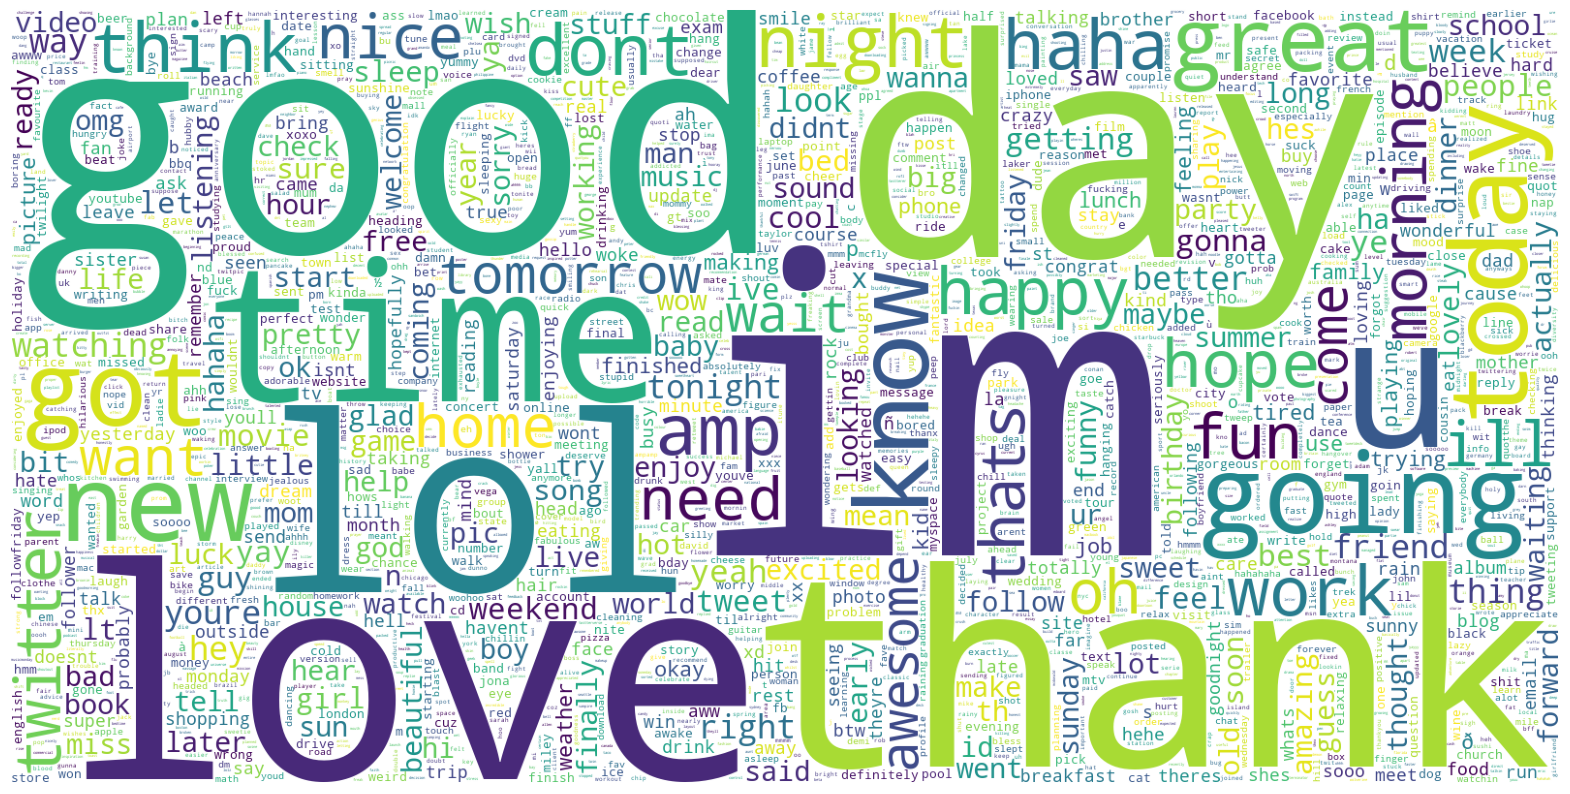

In [44]:
wordCloud(df.loc[df["target"] == 1, "text"],2000)

As the picture shows, a lot of positive words appear: love, thank , haha, new, lol, great, nice, excited, happy, ready...

Generating a word cloud for negative tweets :

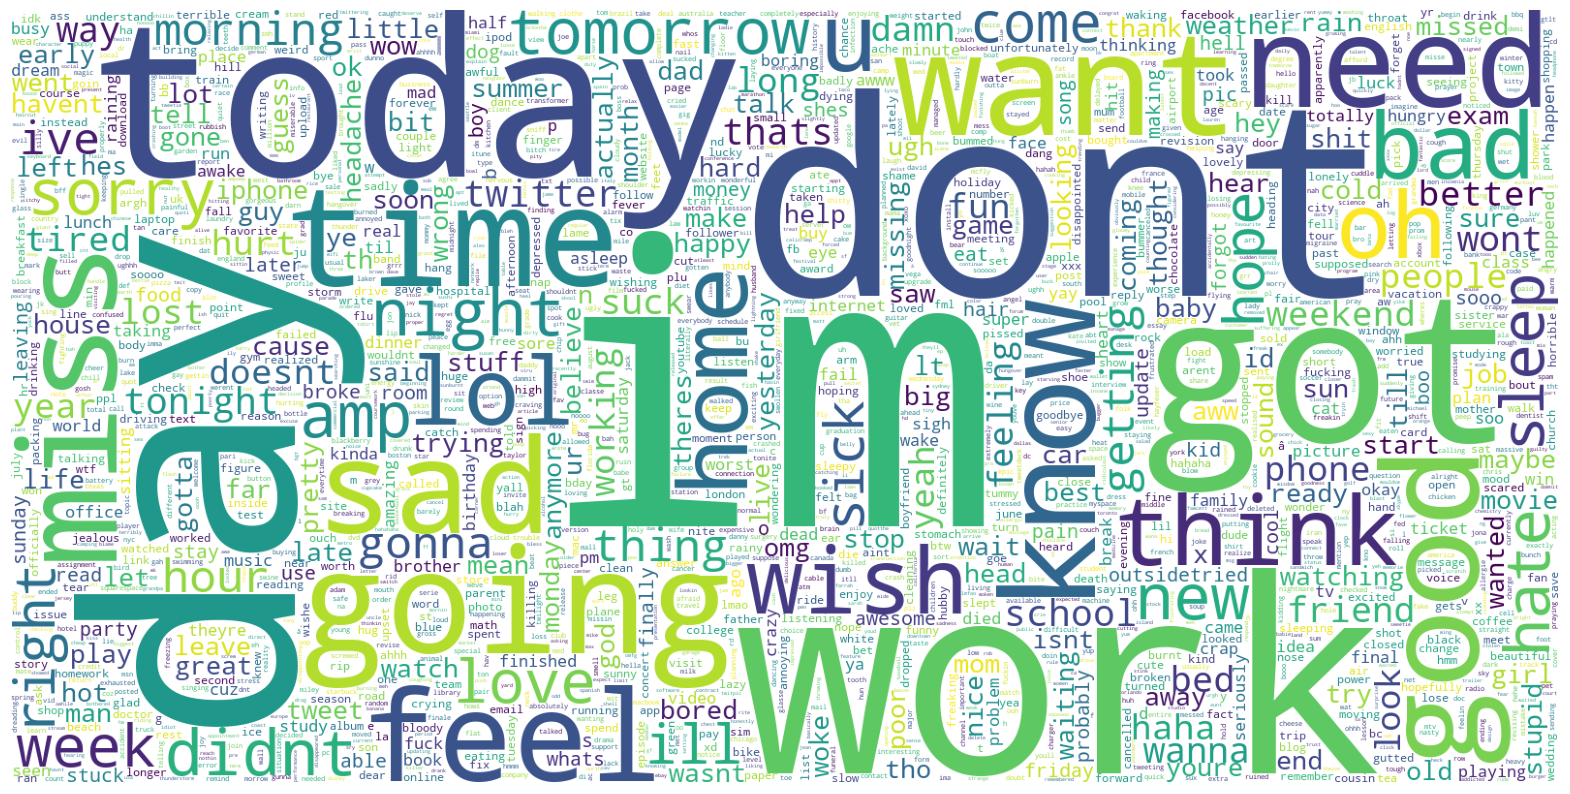

In [45]:
wordCloud(df.loc[df["target"] == 0, "text"], 2000)

As the picture shows, a lot of negative words appear: bad, sad, wish, need, sorry...

In [46]:
# Calculating tweet’s lenght :
df["text_length"] = df["text"].apply(len)


# let's show the mean word count of each sentiment :
round(pd.DataFrame(df.groupby("target").text_length.mean()),2)

,text_length
target,
0,41.25
1,40.92


# Splitting our data into Train and Test Subset

In [47]:
print( "The shape of the original dataset: " + str(df.shape))


The shape of the original dataset: (1461480, 6)


In [48]:
# Separating input feature and label :
X = df["tokenized_tweets_stemmed_lemmatized"]
y = df["target"]


In [49]:
# Separating the 85% data for training data and 15% for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)


# Word Embedding and Transforming Dataset using TF-IDF Vectorizer

In [50]:
# Quick overview of our dataset:
df.head()

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized,text_length
0,0,awww thats bummer shoulda got david carr day d,"[awww, thats, bummer, shoulda, got, david, car...",awww that bummer shoulda got david carr day d,awww that bummer shoulda got david carr day d,46
1,0,upset update facebook texting result school to...,"[upset, update, facebook, texting, result, sch...",upset updat facebook text result school today ...,upset updat facebook text result school today ...,54
2,0,dived times ball managed save rest bounds,"[dived, times, ball, managed, save, rest, bounds]",dive time ball manag save rest bound,dive time ball manag save rest bound,41
3,0,body feels itchy like,"[body, feels, itchy, like]",bodi feel itchi like,bodi feel itchi like,21
4,0,behaving im mad,"[behaving, im, mad]",behav im mad,behav im mad,15


In [51]:
# Fit the TF-IDF Vectorizer :
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectorizer.fit(X_train)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

print('No. of feature words:', len(feature_names))

No. of feature words: 10000


In [52]:
# Transform the data using TF-IDF Vectorizer :
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)



# Function for Model Evaluation

In [53]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Model Building

		 **** The training execution time of this model is 0.59 seconds **** 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75    111228
           1       0.74      0.78      0.76    107994

    accuracy                           0.76    219222
   macro avg       0.76      0.76      0.76    219222
weighted avg       0.76      0.76      0.76    219222

		 **** The test execution time of this model is 1.01 seconds **** 



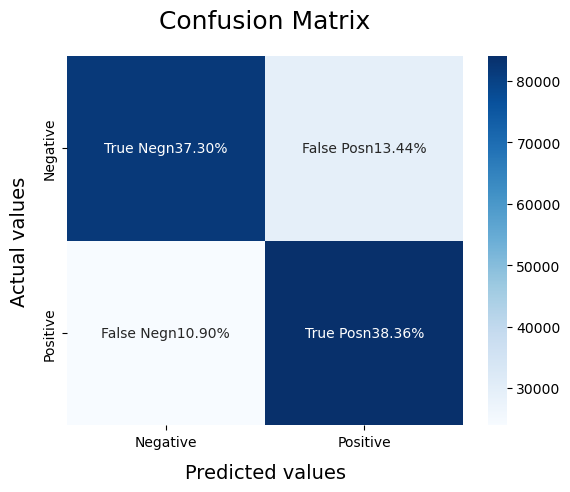

In [54]:
# Model-1 : Bernoulli Naive Bayes.
BNBmodel = BernoulliNB()
start1 = time.time()
BNBmodel.fit(X_train, y_train)
end1 = time.time()
print("\t\t **** The training execution time of this model is {:.2f} seconds **** \n".format(end1-start1))

start2 = time.time()
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
end2 = time.time()
print("\t\t **** The test execution time of this model is {:.2f} seconds **** \n".format(end2-start2))

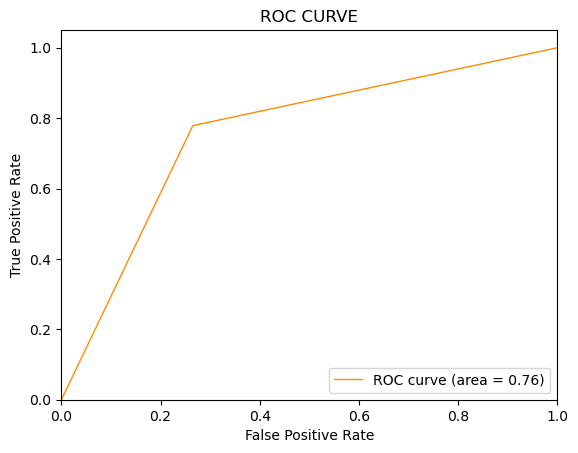

In [55]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

		 **** The training execution time of this model is 29.58 seconds **** 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77    111228
           1       0.75      0.79      0.77    107994

    accuracy                           0.77    219222
   macro avg       0.77      0.77      0.77    219222
weighted avg       0.77      0.77      0.77    219222

		 **** The test execution time of this model is 0.77 seconds **** 



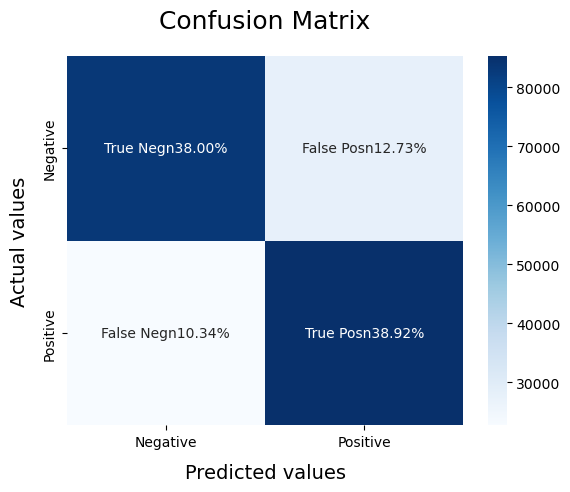

In [56]:
# Model-2 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start1 = time.time()
LRmodel.fit(X_train, y_train)
end1 = time.time()
print("\t\t **** The training execution time of this model is {:.2f} seconds **** \n".format(end1-start1))
start2 = time.time()
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
end2 = time.time()
print("\t\t **** The test execution time of this model is {:.2f} seconds **** \n".format(end2-start2))

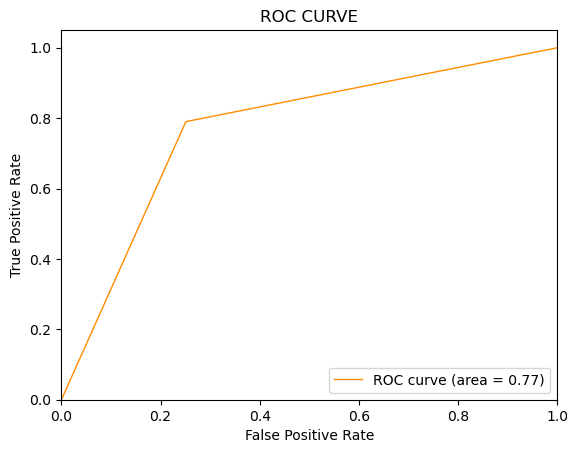

In [57]:
# Plot the ROC-AUC Curve for model-2 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### Conclusion:

| Model Id | Model Name                      | Accuracy | F1-score (class 0) | F1-score (class 1) | AUC Score | Training execution time (seconds) | Testing execution time (seconds) | Nature of dataset used for training | Nature of dataset used for testing |
|----------|--------------------------------|----------|---------------------|---------------------|-----------|-----------------------------------|----------------------------------|-------------------------------------|------------------------------------|
| 1        | Bernoulli Naive Bayes (BNB)    | 73%      | 73%                 | 74%                 | 73%       | 0.44                              | 0.77                             | full dataset                        | full dataset                       |
| 2        | Logistic Regression (LR)       | 74%      | 74%                 | 75%                 | 74%       | 36.13                             | 0.67                             | full dataset                        | full dataset                       |


# Conclusion